<a href="https://colab.research.google.com/github/sivanimarepalli/Online_fraud_detect/blob/main/onlinefraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
df=pd.read_csv('data.csv')

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
df.shape

(6313061, 11)

In [ ]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,1
nameDest,1
oldbalanceDest,1
newbalanceDest,1
isFraud,1


In [ ]:
df['isFraud'].value_counts()

,count
isFraud,
0.0,6305505
1.0,7555


In [ ]:
notF = df[df.isFraud == 0].sample(8213)
isF = df[df.isFraud == 1]

In [ ]:
newDf = pd.concat([isF, notF]).sort_index()
newDf.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6118804,535,CASH_OUT,606501.57,C1911204207,606501.57,0.0,C1641192093,123759.67,730261.24,1.0,0.0
6168687,558,TRANSFER,4529.65,C954298206,4529.65,0.0,C18650773,0.00,0.00,1.0,0.0
6064513,505,CASH_OUT,745156.83,C189207115,745156.83,0.0,C1009906459,6325085.98,7070242.82,1.0,0.0
6008483,436,CASH_OUT,591766.42,C1492365838,591766.42,0.0,C1180486169,7334547.33,7926313.75,1.0,0.0
1070163,127,CASH_OUT,701707.89,C906024214,701707.89,0.0,C322369737,3010281.05,3711988.94,1.0,0.0


In [ ]:
newDf.shape

(15768, 11)

In [ ]:
newDf['isFraud'].value_counts()

,count
isFraud,
0.0,8213
1.0,7555


In [ ]:
newDf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15768 entries, 2 to 6312328
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            15768 non-null  int64  
 1   type            15768 non-null  object 
 2   amount          15768 non-null  float64
 3   nameOrig        15768 non-null  object 
 4   oldbalanceOrg   15768 non-null  float64
 5   newbalanceOrig  15768 non-null  float64
 6   nameDest        15768 non-null  object 
 7   oldbalanceDest  15768 non-null  float64
 8   newbalanceDest  15768 non-null  float64
 9   isFraud         15768 non-null  float64
 10  isFlaggedFraud  15768 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 1.4+ MB


In [ ]:
newDf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
step,15768.0,2.876605e+02,1.761845e+02,1.0,159.0000,276.000,3.980000e+02,6.860000e+02
amount,15768.0,7.869312e+05,1.799236e+06,0.0,35281.8125,167095.665,5.156405e+05,2.649000e+07
oldbalanceOrg,15768.0,1.209399e+06,3.138188e+06,0.0,9977.8650,110528.530,7.710248e+05,5.958504e+07
newbalanceOrig,15768.0,5.330494e+05,2.468595e+06,0.0,0.0000,0.000,0.000000e+00,4.958504e+07
oldbalanceDest,15768.0,8.143326e+05,3.304193e+06,0.0,0.0000,0.000,5.225581e+05,2.362305e+08
newbalanceDest,15768.0,1.226800e+06,3.693834e+06,0.0,0.0000,136304.955,1.078140e+06,2.367265e+08
isFraud,15768.0,4.791350e-01,4.995803e-01,0.0,0.0000,0.000,1.000000e+00,1.000000e+00
isFlaggedFraud,15768.0,7.610350e-04,2.757724e-02,0.0,0.0000,0.000,0.000000e+00,1.000000e+00


In [ ]:
newDf['type'].value_counts()

,count
type,
CASH_OUT,6722
TRANSFER,4462
PAYMENT,2687
CASH_IN,1841
DEBIT,56


<Axes: xlabel='type', ylabel='amount'>

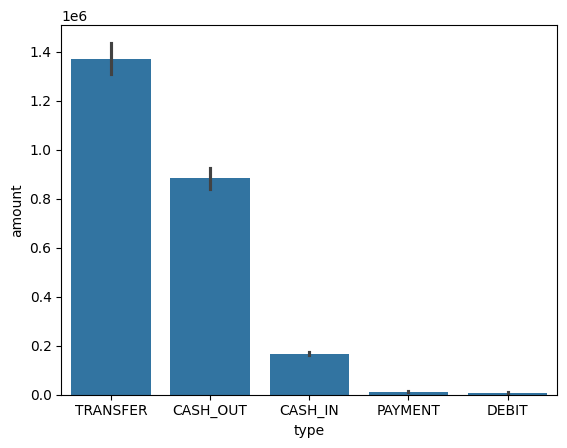

In [ ]:
sns.barplot(x='type',y='amount', data=newDf)

<Axes: xlabel='amount', ylabel='step'>

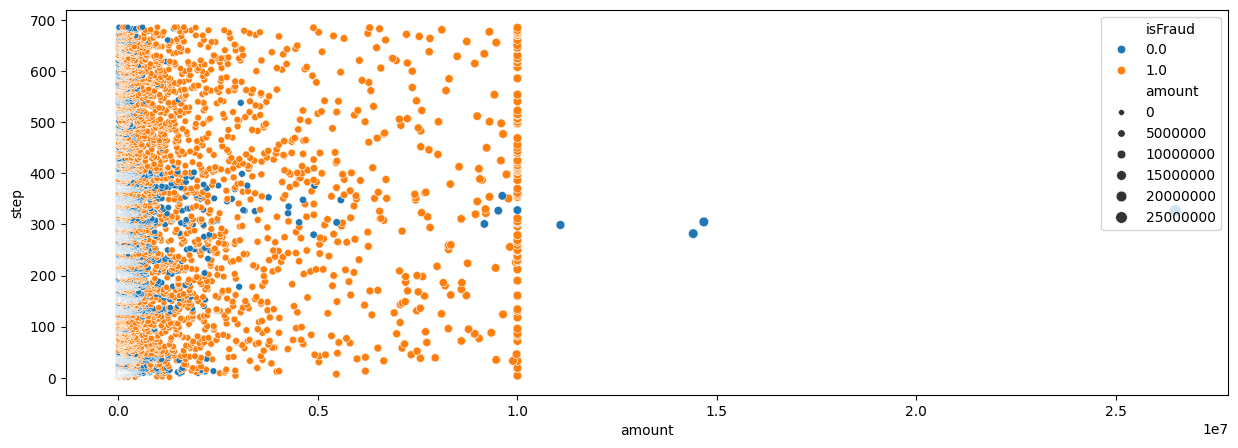

In [ ]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=newDf,x='amount',y='step',hue='isFraud',size='amount')

<Axes: xlabel='oldbalanceOrg', ylabel='newbalanceDest'>

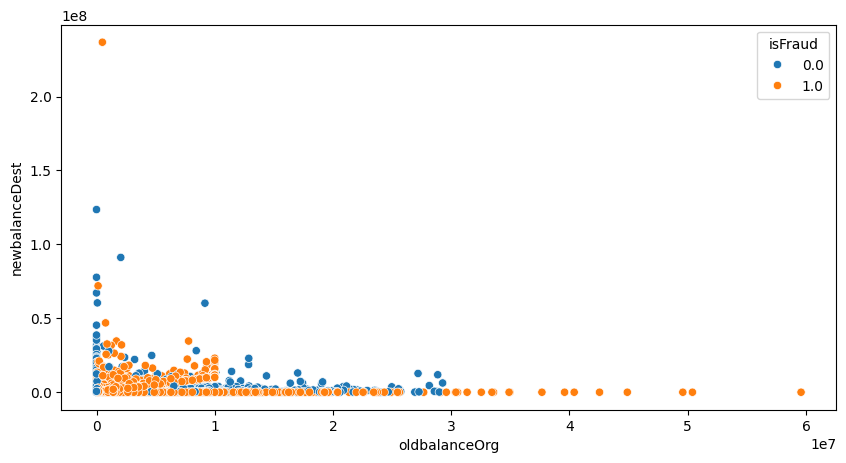

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=newDf,x='oldbalanceOrg',y='newbalanceDest',hue='isFraud')

In [ ]:
CrosstabResult=pd.crosstab(index=newDf.type,columns=df.isFraud)
CrosstabResult

isFraud,0.0,1.0
type,,
CASH_IN,1841,0
CASH_OUT,2935,3787
DEBIT,56,0
PAYMENT,2687,0
TRANSFER,694,3768


<Axes: xlabel='type'>

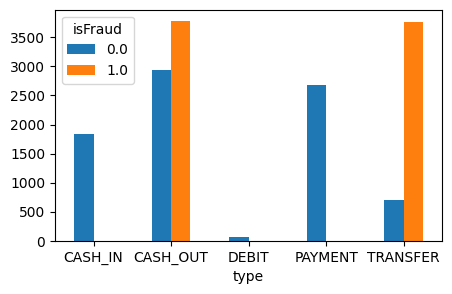

In [ ]:
CrosstabResult.plot.bar(figsize=(5,3), rot=0)

In [ ]:
CrossTab_step= pd.crosstab(index=newDf.step,columns=df.isFraud).sort_values(by=1, ascending=False).head(5)
CrossTab_step

isFraud,0.0,1.0
step,,
212,49,40
523,0,30
425,0,28
501,0,28
387,0,28


<Axes: xlabel='step'>

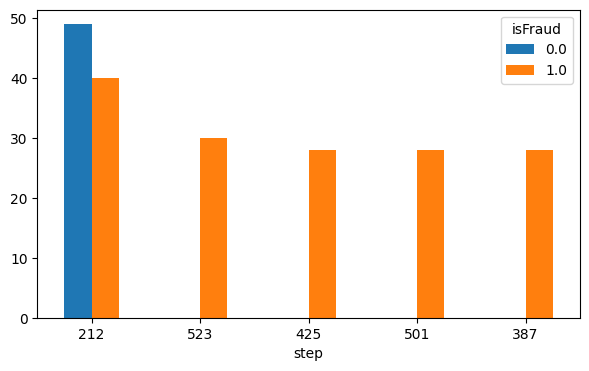

In [ ]:
CrossTab_step.plot.bar(figsize=(7,4), rot=0)

In [ ]:
df_1 = pd.get_dummies(newDf,columns=['type'])
df_1.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
2,1,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1.0,0.0,False,False,False,False,True
3,1,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1.0,0.0,False,True,False,False,False
251,1,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1.0,0.0,False,False,False,False,True
252,1,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1.0,0.0,False,True,False,False,False
680,1,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1.0,0.0,False,False,False,False,True


In [ ]:
df_1=df_1.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1)

In [ ]:
X = df_1.loc[:, df_1.columns!= 'isFraud']
y = df_1.loc[:, df_1.columns== 'isFraud']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
model = svm.SVC(kernel='rbf',C=30)
model.fit(X_train,y_train)
model.score(X_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9025575988163179

In [ ]:
model1=LogisticRegression(solver='liblinear',multi_class='ovr',random_state=42)
model1.fit(X_train,y_train)
model1.score(X_test,y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


0.8998097653772986

In [ ]:
model2=RandomForestClassifier(n_estimators=5)
model2.fit(X_train,y_train)
model2.score(X_test,y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9883745508349187

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
model_pred_test = model.predict(X_test)
accuracy_score(y_test, model_pred_test)

0.9025575988163179

In [ ]:
conf_matrix = confusion_matrix(y_test, model_pred_test)
conf_matrix

array([[2391,   63],
       [ 398, 1879]])

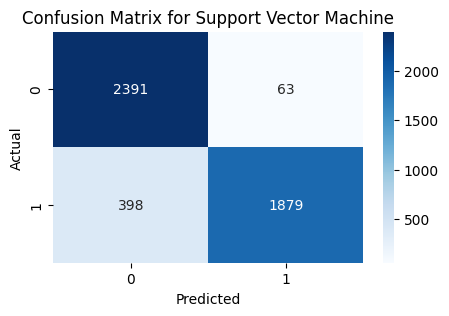

In [ ]:
plt.figure(figsize=(5,3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Support Vector Machine')
plt.show()

In [ ]:
print(classification_report(y_test, model_pred_test))

              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91      2454
         1.0       0.97      0.83      0.89      2277

    accuracy                           0.90      4731
   macro avg       0.91      0.90      0.90      4731
weighted avg       0.91      0.90      0.90      4731



In [ ]:
model1_pred_test = model1.predict(X_test)
accuracy_score(y_test, model1_pred_test)

0.8998097653772986

In [ ]:
conf_matrix1 = confusion_matrix(y_test,model1_pred_test)
conf_matrix1

array([[2252,  202],
       [ 272, 2005]])

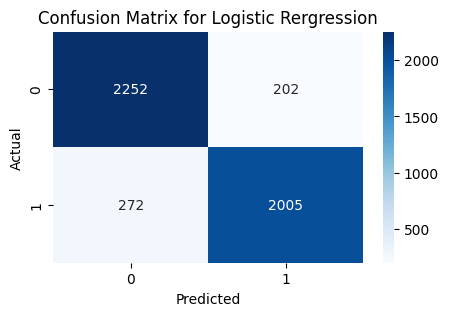

In [ ]:
plt.figure(figsize=(5,3))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Rergression')
plt.show()

In [ ]:
print(classification_report(y_test, model1_pred_test))

              precision    recall  f1-score   support

         0.0       0.89      0.92      0.90      2454
         1.0       0.91      0.88      0.89      2277

    accuracy                           0.90      4731
   macro avg       0.90      0.90      0.90      4731
weighted avg       0.90      0.90      0.90      4731



In [ ]:
model2_pred_test = model2.predict(X_test)
accuracy_score(y_test, model2_pred_test)

0.9883745508349187

In [ ]:
conf_matrix2 = confusion_matrix(y_test, model2_pred_test)
conf_matrix2

array([[2416,   38],
       [  17, 2260]])

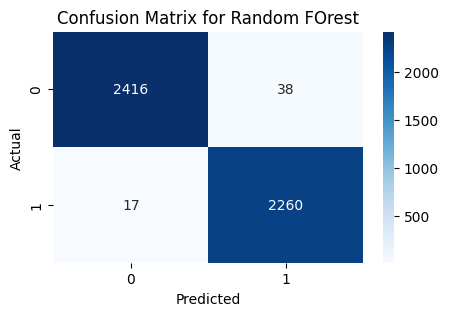

In [ ]:
plt.figure(figsize=(5,3))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random FOrest')
plt.show()

In [ ]:
print(classification_report(y_test, model2_pred_test))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      2454
         1.0       0.98      0.99      0.99      2277

    accuracy                           0.99      4731
   macro avg       0.99      0.99      0.99      4731
weighted avg       0.99      0.99      0.99      4731



In [ ]:
X1 = df_1.loc[:, df_1.columns!= 'isFraud']
y1 = np.squeeze(df_1.loc[:, df_1.columns== 'isFraud'])

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30, random_state=42)

In [ ]:
model_params = {
    'svm': {
        'model': svm.SVC(),
        'params' : {
            'C': [10,20,30],
            'kernel': ['rbf'],
            'gamma' : ['scale','auto']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(),
        'params': {
            'solver' : ['liblinear','lbfgs'],
           'multi_class' : ['auto','ovr'],
            'C': [1,5,10]
        }
    }
}

In [ ]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X1_train,y1_train)
    clf.score(X1_test, y1_test)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

In [ ]:
df_new = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_new

,model,best_score,best_params
0,svm,0.902419,"{'C': 30, 'gamma': 'scale', 'kernel': 'rbf'}"
1,random_forest,0.984506,{'n_estimators': 5}
2,logistic_regression,0.910301,"{'C': 1, 'multi_class': 'auto', 'solver': 'lib..."
